In [4]:
# !pwd

In [5]:
import os
os.chdir('/Users/adityapatel/personal/projects/git/clash/notebooks')

In [111]:
import pymysql
import pymysql.cursors
import config
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
import numpy as np

In [9]:
import sqlalchemy

In [10]:
sns.set()

In [54]:
connection = pymysql.connect(host=config._mysql_host,
                             user=config._mysql_user,
                             password=config._mysql_password,
                             db=config._mysql_db,
                             port=config._mysql_port,
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [55]:
sql = '''

select p.*, c.clan_name
from player_stats_current p
left join clan_stats_current c on p.clan_tag = c.clan_tag

'''

In [56]:
with connection.cursor() as cursor:
    # Create a new record
    cursor.execute(sql)
    results = cursor.fetchall()
    

In [57]:
df_raw = pd.DataFrame(results)

In [121]:
df = df_raw.copy()

In [139]:
df = df.dropna(subset=['queen_level'])

In [141]:
# df.shape

In [146]:
queen_level = df['queen_level']
exp_level = df['exp_level']
clan_name = df['clan_name']

In [147]:
queen_level_new = queen_level[:, np.newaxis]

In [184]:
queen_train = queen_level_new[50:]
queen_test = queen_level_new[:50]

In [185]:
exp_train = exp_level[50:]
exp_test = exp_level[:50]

In [188]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [189]:
regr.fit(queen_train, exp_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [190]:
# Make predictions using the testing set
exp_pred = regr.predict(queen_test)

In [191]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(exp_test, exp_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(exp_test, exp_pred))

Coefficients: 
 [1.79021447]
Mean squared error: 147.88
Variance score: 0.83


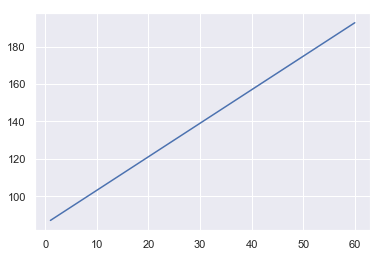

In [208]:
sns.lineplot(x=np.squeeze(queen_test), y=exp_pred)

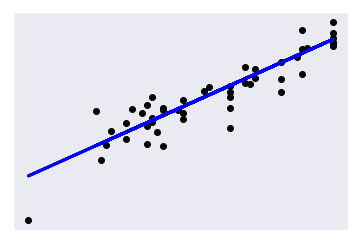

In [210]:
# Plot outputs
plt.scatter(np.squeeze(queen_test), exp_test,  color='black')
plt.plot(np.squeeze(queen_test), exp_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [204]:
queen_test.shape

(50, 1)

In [206]:
exp_pred.shape

(50,)

In [149]:
# Train the model using the training sets
regr.fit(queen_level_new, exp_level)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
# Make predictions using the testing set
y_pred = regr.predict(queen_level_new)

In [174]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(queen_level_new, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(queen_level_new, y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 968461977.22
Variance score: -3631002.94


In [177]:
# queen_level_new

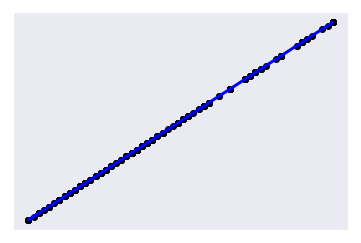

In [175]:
# Plot outputs
plt.scatter(queen_level_new, y_pred,  color='black')
plt.plot(queen_level_new, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [160]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [161]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [162]:
diabetes['target'].shape

(442,)

In [163]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [164]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [165]:
diabetes_X.shape

(442, 1)

In [166]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [167]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [168]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [170]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


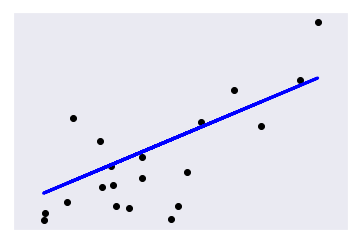

In [171]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [199]:
diabetes_X_test

array([[ 0.07786339],
       [-0.03961813],
       [ 0.01103904],
       [-0.04069594],
       [-0.03422907],
       [ 0.00564998],
       [ 0.08864151],
       [-0.03315126],
       [-0.05686312],
       [-0.03099563],
       [ 0.05522933],
       [-0.06009656],
       [ 0.00133873],
       [-0.02345095],
       [-0.07410811],
       [ 0.01966154],
       [-0.01590626],
       [-0.01590626],
       [ 0.03906215],
       [-0.0730303 ]])

In [200]:
diabetes_y_pred

array([56447.1905369 , 49879.52550814, 56447.1905369 , 47064.81192439,
       47064.81192439, 50817.76336939, 23608.86539311, 19855.9139481 ,
       23608.86539311, 50817.76336939, 25485.34111561, 22670.62753186,
       56447.1905369 , 41435.38475688, 18917.67608685, 25485.34111561,
       21732.38967061, 37682.43331188, 22670.62753186, 24547.10325436,
       13288.24891934, 29238.29256062, 32991.24400562, 14226.4867806 ,
       25485.34111561, 28300.05469936, 16102.9625031 , 29238.29256062,
       29238.29256062, 15164.72464185, 42373.62261813, 22670.62753186,
       23608.86539311, 18917.67608685, 33929.48186687, 37682.43331188,
       23608.86539311,  1091.15672308, 37682.43331188, 51756.00123065,
       56447.1905369 , 56447.1905369 , 50817.76336939, 47064.81192439,
       40497.14689563, 40497.14689563, 56447.1905369 , 37682.43331188,
       42373.62261813, 37682.43331188, 41435.38475688, 37682.43331188,
       37682.43331188, 56447.1905369 , 28300.05469936, 42373.62261813,
      

In [13]:
connection.close()